In [ ]:
import pandas as pd
from glob import glob
import itertools
from collections import Counter
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import time
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import powerlaw
from sklearn import linear_model
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.formula.api as smf

# clean data

In [26]:
columns = 'user_id，sex，age，occupation_name，education_name，user_opentime，brand_name，call_duration_m，gprs_flow，\
call_fee，gprs_fee，databusiness_fee，order_name，brand_chn，model_chn，screensize，operation_sys，terminal_price，\
dept_county_name，dept_name'.split('，')

basename=pd.read_csv('./basename.csv', encoding='gbk', names=columns)

FileNotFoundError: File b'./basename.csv' does not exist

In [4]:
# extract the valid information and delete the nan,0,‘不详’
basename_except=basename.drop(['order_name'],axis=1)
basename_except=basename_except.drop_duplicates()

basename_except['sex']=basename_except['sex'].replace('不详',np.nan)

basename_except['age']=basename_except['age'].replace(0,np.nan)

basename_except['terminal_price']=basename_except['terminal_price'].replace(0,np.nan)

basename_except['dept_county_name']=basename_except['dept_county_name'].replace('分公司不详',np.nan)

basename_except['dept_name']=basename_except['dept_name'].replace('片区不详',np.nan)

basename_except['databusiness_fee']=basename_except['databusiness_fee'].replace(np.nan,0)

In [6]:
house_pricing = pd.read_csv('./STAYsWithHP.csv',names = ['UserID','stays','headidentifier','headerIdentifier','Home_Lon',
'Home_Lat','Work_Lon','Work_Lat','Gender','Age','PlanFee','PhonePrice','HousePrice'])

In [7]:
diction = dict(house_pricing[['UserID','HousePrice']].values)
basename_except['HousePrice'] = basename_except['user_id'].apply(lambda x: diction[x]
                                                    if x in diction
                                                    else np.nan)

In [8]:
basename_except['fees']=basename_except['call_fee']+basename_except['gprs_fee']+basename_except['databusiness_fee']

In [9]:
basename_except.to_csv('./basename_except.csv', header = False, index = False)

# user profile information

In [2]:
basename_except = pd.read_csv('./basename_except.csv')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
basename_except['brand_chn']=basename_except['brand_chn'].replace('苹果','Apple')

basename_except['brand_chn']=basename_except['brand_chn'].replace('三星','Samsung')
basename_except['brand_chn']=basename_except['brand_chn'].replace('联想','Lenovo')
basename_except['brand_chn']=basename_except['brand_chn'].replace('小米','MI')
basename_except['brand_chn']=basename_except['brand_chn'].replace('华为','Huawei')
basename_except['brand_chn']=basename_except['brand_chn'].replace('酷派','Coolpad')
basename_except['brand_chn']=basename_except['brand_chn'].replace('索尼','Sony')
basename_except['brand_chn']=basename_except['brand_chn'].replace('摩托罗拉','MOTO')

basename_except['brand_chn']=basename_except['brand_chn'].replace('诺基亚','Nokia')


In [4]:
x=basename_except['brand_chn'].unique()
basename_except['brand_chn']=basename_except['brand_chn'].replace(list(set(x)-set(['Apple','Samsung','Lenovo','MI','Huawei','Coolpad','Sony','MOTO','Nokia'])),'Others')
basename_except['sex']=basename_except['sex'].replace('男','Male')
basename_except['sex']=basename_except['sex'].replace('女','Female')

In [5]:
basename_except.head()

,user_id,sex,age,occupation_name,education_name,user_opentime,brand_name,call_duration_m,gprs_flow,call_fee,...,model_chn,screensize,operation_sys,terminal_price,dept_county_name,dept_name,house_price,fees,record,location
0,50785931,Male,75.0,NaN,NaN,20090102.0,神州行,515.0,51.92,NaN,...,LT22I,4.0,ANDROID,1699.0,大兴分公司,庞各庄,40007.0,NaN,7686.0,15.0
1,42280517,Female,NaN,NaN,NaN,20100227.0,神州行,320.0,28.41,16.56,...,IPHONE 4,3.0,IOS,2599.0,通州分公司,西部片区,18609.0,34.56,2105.0,16.0
2,40688293,Male,24.0,NaN,NaN,20051226.0,动感地带,283.0,132.16,25.00,...,IPHONE 5,4.0,IOS,4199.0,城区三分公司,中关村片区1,40252.0,NaN,7909.0,68.0
3,31430787,Male,28.0,NaN,NaN,20060211.0,全球通,2447.0,339.84,295.52,...,IPHONE 5,4.0,IOS,4199.0,城区二分公司,东城片区,41821.0,338.60,20385.0,82.0
4,35548330,Female,NaN,NaN,NaN,20060115.0,动感地带,1330.0,110.28,39.08,...,DESIRE S (G12),3.0,ANDROID,NaN,城区二分公司,宣武片区,31774.0,39.08,4337.0,62.0


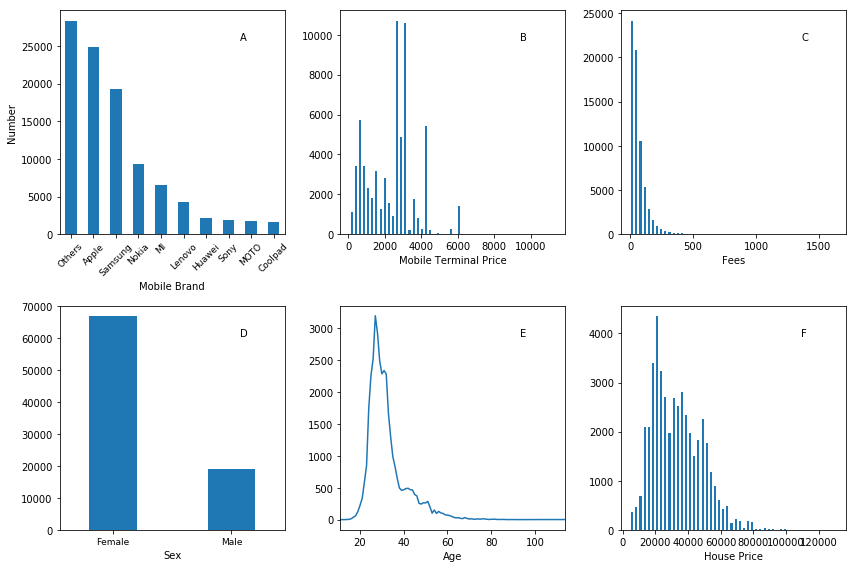

In [7]:
fig=plt.figure(figsize=(12,8),facecolor='white') 
# cmap = cm.get_cmap('Accent',5)

ax=fig.add_subplot(2,3,6)
counts=basename_except['brand_chn'].value_counts()
counts.plot.bar(rot=False)
plt.xticks(rotation=45,fontsize=9)
plt.xlabel('Mobile Brand')
plt.ylabel('Number')
ax.text(0.8, 0.9,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax=fig.add_subplot(2,3,1)
plt.hist(basename_except[basename_except['house_price'].notnull()]['house_price'].values,bins=50,rwidth=0.5)
# plt.xticks(range(0,1400,200))
plt.xlabel('House Price')
ax.text(0.8, 0.9,'F',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
# plt.show()

ax=fig.add_subplot(2,3,2)
plt.hist(basename_except[basename_except['terminal_price'].notnull()]['terminal_price'].values,bins=50,rwidth=0.5)
plt.xlabel('Mobile Terminal Price')
# plt.show()
# plt.tight_layout()
ax.text(0.8, 0.9,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax=fig.add_subplot(2,3,3)
plt.hist(basename_except[basename_except['fees'].notnull()]['fees'].values,bins=50,rwidth=0.5)
# plt.xticks(range(0,400,20))
plt.xlabel('Fees')
ax.text(0.8, 0.9,'C',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax=fig.add_subplot(2,3,4)
counts=basename_except['sex'].value_counts()
counts.plot.bar(width=0.4)
plt.xticks(rotation=0,fontsize=9)
plt.xlabel('Sex')
ax.text(0.8, 0.9,'D',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax=fig.add_subplot(2,3,5)
counts1=basename_except['age'].value_counts()
counts1=counts1.sort_index()
plt.xlabel('Age')
counts1.plot()
ax.text(0.8, 0.9,'E',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)




plt.tight_layout()
plt.savefig('./Picture/profile.png',dpi=100)
plt.show()

In [11]:
for c in [x for x in columns]:
    print(c,basename_except[c].dropna().count())

user_id 100000
sex 85879
age 36622
occupation_name 0
education_name 2
user_opentime 99998
brand_name 99997
call_duration_m 99998
gprs_flow 99998
call_fee 82710
gprs_fee 79442
databusiness_fee 100000
brand_chn 86363
model_chn 86363
screensize 86363
operation_sys 81070
terminal_price 64227
dept_county_name 94574
dept_name 89727
house_price 45775
fees 68153


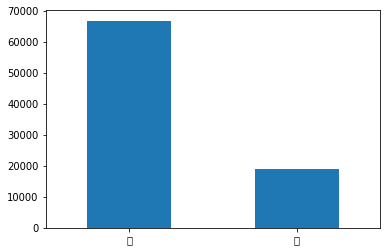

女    66811
男    19068
Name: sex, dtype: int64

In [56]:
counts=basename_except['sex'].value_counts()
counts.plot.bar(rot=False)
plt.show()
counts

In [61]:
basename_except['user_opentime']=basename_except['user_opentime'].dropna().map(lambda x: int(x/10000))                                    

In [12]:
basename_except['fees'].describe()

count    68153.000000
mean        64.667808
std         66.871978
min          0.000000
25%         24.780000
50%         46.180000
75%         81.680000
max       1643.310000
Name: fees, dtype: float64

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


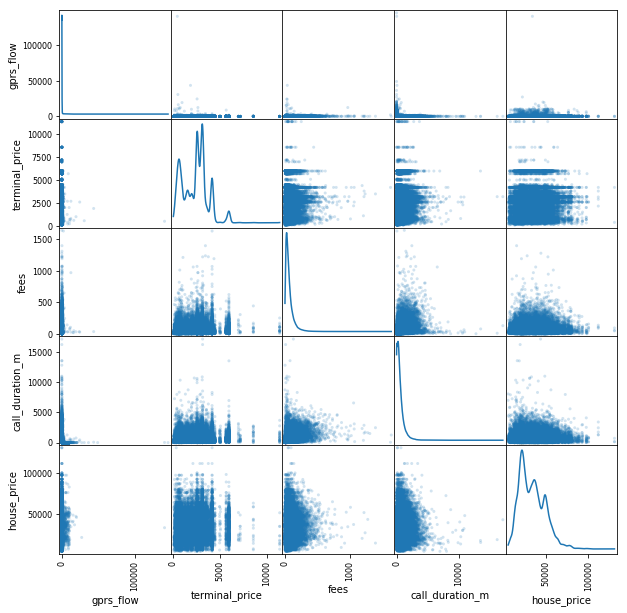

In [8]:
data=basename_except[['gprs_flow','terminal_price','fees','call_duration_m','house_price']]
scatter_matrix(data,alpha=0.2,figsize=(10,10),diagonal='kde')
plt.show()

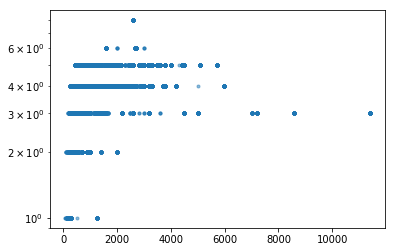

In [52]:
x=basename_except['terminal_price']
y=basename_except['screensize']
plt.plot(x, y,'.', alpha = .5)
# plt.xscale('log')
plt.yscale('log')
plt.show()

In [15]:
basename_except = basename_except.fillna(basename_except.mean())


http://wiki.swarma.net/index.php?title=python&variant=zh

In [25]:
import scipy.interpolate
def densityPlot(x,y):
    rx = (x.max()-x.min())/20
    ry = (y.max()-y.min())/20
    z=[]
    for x0,y0 in zip(x,y):
        n=0
        for x1,y1 in zip(x,y):
            if np.abs(x1-x0)<=rx and np.abs(y1-y0)<=ry:
                n+=1
        z.append(n)
    z=np.array(z)
    # Set up a regular grid of interpolation points
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    # Interpolate
    rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
    zi = rbf(xi, yi)
    plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',cmap = plt.get_cmap('gray'),
               extent=[x.min(), x.max(), y.min(), y.max()])
    plt.scatter(x, y, c= z,s=5, edgecolors='none',alpha=0.7)
    plt.colorbar()
    plt.show()

densityPlot(x, y)

KeyboardInterrupt: 

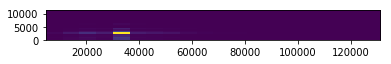

In [32]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant, beta = res.params
#plt.plot(x,y,".",color="m")
plt.imshow(heatmap[:,::-1].T, extent=extent)
plt.axis(extent)
plt.show()

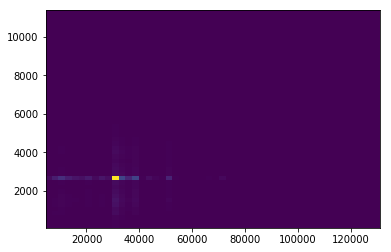

In [26]:
H, xedges, yedges = np.histogram2d(x, y, bins=50)
plt.pcolor(xedges, yedges, H)

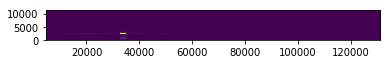

In [21]:
x = basename_except['house_price']
y = basename_except['terminal_price']
# plt.subplot(121)
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap[:,::-1].T, extent=extent)
# plt.subplot(122) 
# H, xedges, yedges = np.histogram2d(x, y, bins=50)
# plt.pcolor(xedges, yedges, H)
# plt.show()

In [47]:
basename_exceptnan=basename_except[['fees','terminal_price']].dropna(axis=0,how='any')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


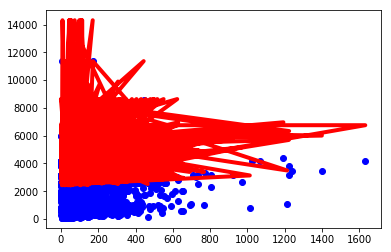

In [50]:
# 建立线性回归模型
regr = linear_model.LinearRegression()

# 拟合
regr.fit(basename_exceptnan['fees'].reshape(-1, 1), basename_exceptnan['terminal_price']) # 注意此处.reshape(-1, 1)，因为X是一维的！

# 不难得到直线的斜率、截距
a, b = regr.coef_, regr.intercept_


# 画图
# 1.真实的点
plt.scatter(basename_exceptnan['fees'], basename_exceptnan['terminal_price'], color='blue')

# 2.拟合的直线
plt.plot(basename_exceptnan['fees'], regr.predict(basename_exceptnan['terminal_price'].reshape(-1,1)), color='red', linewidth=4)

plt.show()

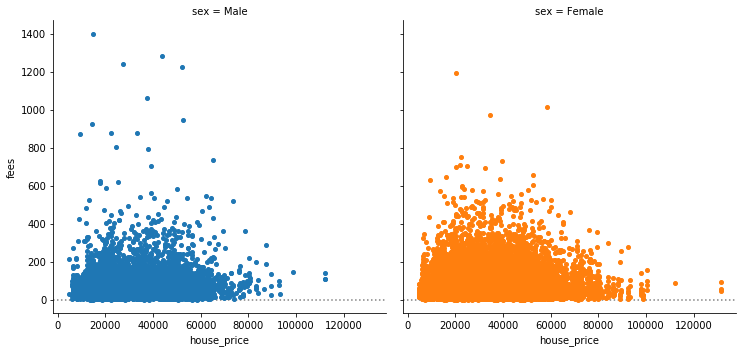

In [16]:
df=basename_except[["house_price", "fees", "sex"]]

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="sex", hue="sex", col_wrap=5, size=5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "house_price", "fees", marker="o",linestyle = '', ms=4)

# Adjust the tick positions and labels
# grid.set(xticks=np.arange(5), yticks=[-3, 3],
#          xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
# grid.fig.tight_layout(w_pad=1)
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [18]:
basename_except['age'].describe()

count    36622.000000
mean        32.168806
std          8.658270
min         11.000000
25%         27.000000
50%         30.000000
75%         35.000000
max        114.000000
Name: age, dtype: float64

In [57]:
basename_except['age']=basename_except['age'].apply(lambda x:np.round(x/10))

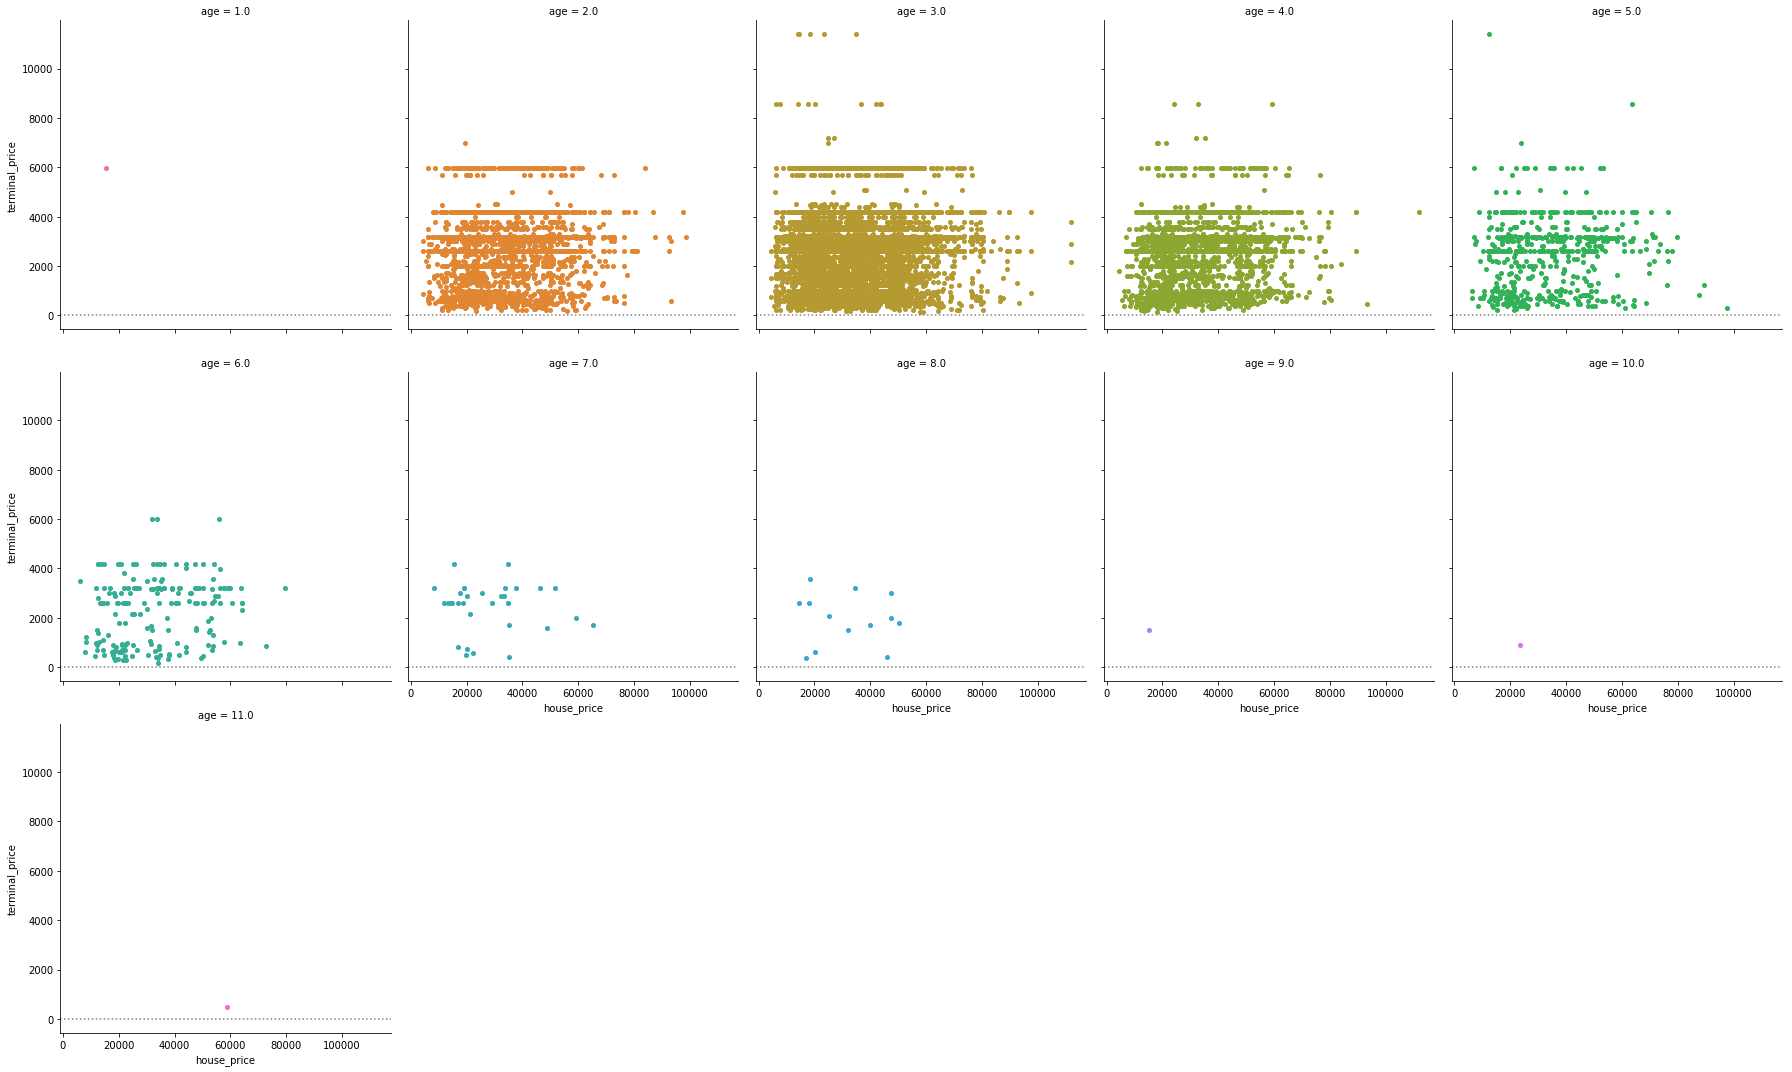

In [23]:
df=basename_except[["house_price", "terminal_price", "age"]]

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="age", hue="age", col_wrap=5, size=5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "house_price", "terminal_price", marker="o",linestyle = '', ms=4)

# Adjust the tick positions and labels
# grid.set(xticks=np.arange(5), yticks=[-3, 3],
#          xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
# grid.fig.tight_layout(w_pad=1)
plt.show()

In [31]:
basename_except.columns

Index(['user_id', 'sex', 'age', 'occupation_name', 'education_name',
       'user_opentime', 'brand_name', 'call_duration_m', 'gprs_flow',
       'call_fee', 'gprs_fee', 'databusiness_fee', 'brand_chn', 'model_chn',
       'screensize', 'operation_sys', 'terminal_price', 'dept_county_name',
       'dept_name', 'house_price', 'fees', 'record', 'location'],
      dtype='object')

In [38]:
basename_except['house_price']=basename_except['house_price']/1000

In [55]:
basename_except['terminal_price']=basename_except['terminal_price'].apply(lambda x:math.log(x))

In [56]:
reg = smf.ols('terminal_price ~ house_price+sex+age+call_duration_m+gprs_flow+call_fee+gprs_fee+\
databusiness_fee+screensize',
               data = basename_except).fit()
 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         terminal_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     33.73
Date:                Wed, 01 Aug 2018   Prob (F-statistic):           1.30e-58
Time:                        20:11:39   Log-Likelihood:                -6562.3
No. Observations:                6330   AIC:                         1.314e+04
Df Residuals:                    6320   BIC:                         1.321e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.3860      0.060    124.106      0.000       7.269       7.503
sex[T.Male]         -0.1104      0.019     -5.904      0.000      -0.147      -0.074
house_price          0.0424      0.006      7.357      0.000       0.031       0.054
age                 -0.0074      0.001     -6.367      0.000      -0.010      -0.005
call_duration_m      0.0001   1.16e-05      8.748      0.000    7.89e-05       0.000
gprs_flow        -8.047e-05   4.96e-05     -1.622      0.105      -0.000    1.68e-05
call_fee            -0.0002      0.000     -1.708      0.088      -0.001    3.55e-05
gprs_fee             0.0008      0.000      3.067      0.002       0.000       0.001
databusiness_fee    -0.0017      0.001     -3.016      0.003      -0.003      -0.001
screensize           0.0890      0.011      8.131      0.000       0.068       0.110
==============================================================================
Omnibus:                      679.730   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              923.335
Skew:                          -0.934   Prob(JB):                    3.16e-201
Kurtosis:                       3.097   Cond. No.                     8.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
male_20=basename_except[(basename_except['sex']=='Male')&(basename_except['age']==2)]

In [63]:
len(male_20)

2426

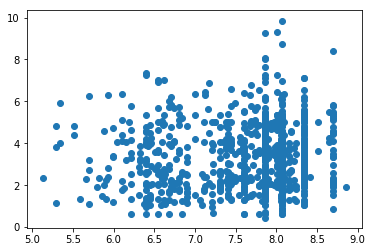

In [64]:
plt.scatter(male_20['terminal_price'],male_20['house_price'])

In [67]:
male_40=basename_except[(basename_except['sex']=='Male')&(basename_except['age']==4)]

In [69]:
len(male_40)

3183

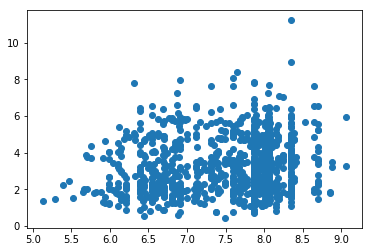

In [68]:
plt.scatter(male_40['terminal_price'],male_40['house_price'])

In [16]:
basename_except['sex']=basename_except['sex'].replace('Male',0)
basename_except['sex']=basename_except['sex'].replace('Female',1)

df=basename_except[['house_price','terminal_price','fees','sex','age']]

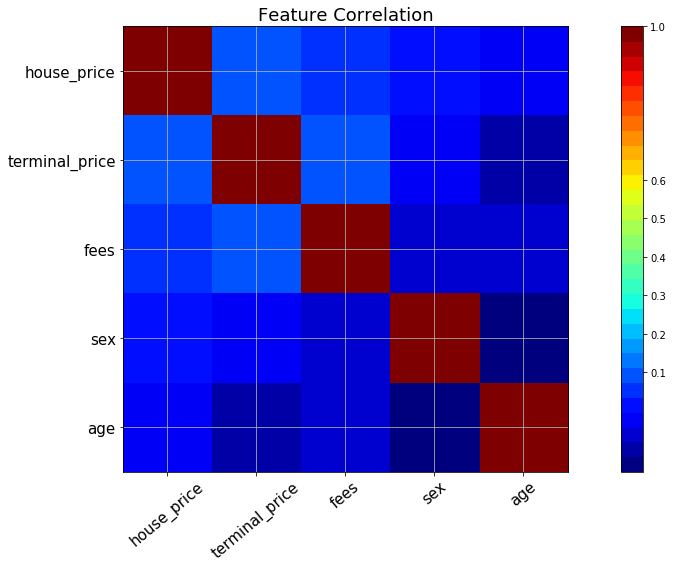

In [18]:
def correlation_matrix(df):
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation',fontsize=18)
    labels=['0','house_price','terminal_price','fees','sex','age']
    ax1.set_xticklabels(labels,fontsize=15)
    ax1.set_yticklabels(labels,fontsize=15)
    plt.xticks(rotation=40)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1,0.2,.3,.4,.5,.6,1])
    plt.tight_layout()
    plt.savefig('./picture/correlation_matrix.png')
    plt.show()
    
    

correlation_matrix(df)

# user behavior information

In [4]:
column_list = 'user_id,access_mode_id,logic_area_name,lac,ci,longtitude,latitude,busi_name,busi_type_name,\
app_name,app_type_name,start_time,up_pack,down_pack,up_flow,down_flow,site_name,site_channel,\
cont_app_id,cont_classify_id,cont_type_id,acce_url'.split(',')

In [2]:
# 服务器

files=glob('/Users/xuhuimin/Documents/lab/labdata/beijingmobile/allusers/*')
user_list = []
record_list = []
location_list = []
for f in files:
    data=pd.read_csv(f,index_col = 0, names = column_list)
    data['location'] = data['longtitude'].astype('str') + ',' + data['latitude'].astype('str')
    data = data[['user_id','location','start_time']]
    user = f.split('/')[-1].split('.')[0].split('_')[-1]
    user_list.append(user)
    record = data['start_time'].nunique()
    record_list.append(record)
    location = data['location'].nunique()
    location_list.append(location)    
    
df=pd.DataFrame([user_list,record_list,location_list]).T
df.columns=['user_id','record','location']
df.to_csv('/Users/xuhuimin/Documents/lab/labdata/beijingmobile/behavior.csv')

NameError: name 'glob' is not defined

In [12]:
behavior=pd.read_csv('./behavior.csv',index_col=0)

FileNotFoundError: File b'./behavior.csv' does not exist

In [6]:
behavior['record_d']=behavior['record']/31

In [135]:
behavior['record'].describe()

count    100000.000000
mean       7369.648480
std       11616.920355
min           1.000000
25%        1307.750000
50%        4178.500000
75%        9032.000000
max      351391.000000
Name: record, dtype: float64

In [7]:
behavior['record_d'].describe()

count    100000.000000
mean        237.730596
std         374.739366
min           0.032258
25%          42.185484
50%         134.790323
75%         291.354839
max       11335.193548
Name: record_d, dtype: float64

In [151]:
behavior['location'].describe()

count    100000.000000
mean         41.966720
std          52.372537
min           1.000000
25%          11.000000
50%          28.000000
75%          54.000000
max        1456.000000
Name: location, dtype: float64

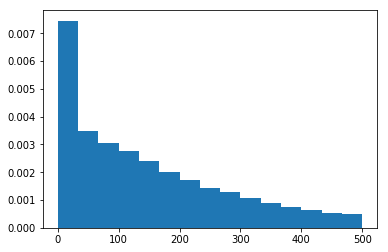

In [27]:
# other example
plt.hist(behavior['record_d'].values, range=(0,500),bins=15, normed=True)
plt.show()

# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set(style="white", palette="muted", color_codes=True)
# # rs = np.random.RandomState(10)

# # Set up the matplotlib figure
# f, axes = plt.subplots(1,2,figsize=(10, 5))
# # sns.despine(left=True)

# # Generate a random univariate dataset
# d = behavior['location'].values
# e = behavior[''].values
# # Plot a simple histogram with binsize determined automatically
# # sns.distplot(d, kde=False, color="b")

# # Plot a kernel density estimate and rug plot
# # sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# # Plot a filled kernel density estimate
# # sns.distplot(d, hist=False, color="g", kde_kws={"shade": True})

# # Plot a historgram and kernel density estimate
# sns.distplot(d,color="b",ax=axes[0])
# plt.xlim(0,400)

# sns.distplot(e,color="b", ax=axes[1])
# plt.xticks(range(50,250,50))
# # plt.setp(axes, yticks=[])
# plt.tight_layout()

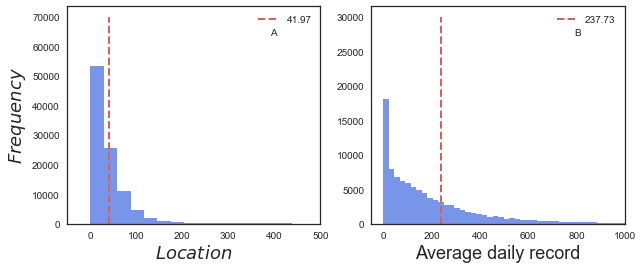

In [150]:
fig = plt.figure(figsize=(10, 4),facecolor='white')

ax = fig.add_subplot(121)
mz=np.mean(behavior['location'].values)
plt.plot([mz,mz],[0,70000],'r-',linewidth=2,linestyle='--',label=str(np.round(mz,2)))
plt.hist(behavior['location'].values,50,color='RoyalBlue',alpha=0.7)
plt.xlim(-50,500)
plt.legend(loc=1,frameon=False)
plt.ylabel(r'$Frequency$',size=18)
plt.xlabel(r'$Location $',size=18)
ax.text(0.8, 0.9,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax = fig.add_subplot(122)
mz=np.mean(behavior['record_d'].values)
plt.plot([mz,mz],[0,30000],'r-',linewidth=2,linestyle='--',label=str(np.round(mz,2)))
plt.hist(behavior['record_d'].values,500,color='RoyalBlue',alpha=0.7)
plt.xlim(-50,1000)
plt.legend(loc=1,frameon=False)
plt.xlabel('Average daily record',size=18)
ax.text(0.8, 0.9,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.savefig('./picture/behavior.png',dpi=100)
plt.show()

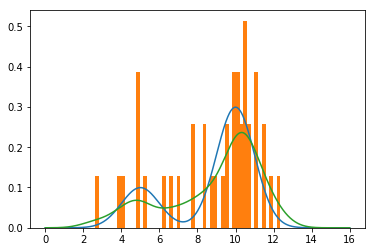

In [39]:
# other example

# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.mlab as mlab
# from sklearn.neighbors import KernelDensity

# # Generate random samples from a mixture of 2 Gaussians
# # with modes at 5 and 10
# data = np.concatenate((5 + np.random.randn(10, 1),
#                        10 + np.random.randn(30, 1)))

# # Plot the true distribution
# x = np.linspace(0, 16, 1000)[:, np.newaxis]
# norm_vals = mlab.normpdf(x, 5, 1) * 0.25 + mlab.normpdf(x, 10, 1) * 0.75
# plt.plot(x, norm_vals)

# # Plot the data using a normalized histogram
# plt.hist(data, 50, normed=True)

# # Do kernel density estimation
# kd = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(data)

# # Plot the estimated densty
# kd_vals = np.exp(kd.score_samples(x))
# plt.plot(x, kd_vals)

# # Show the plots
# plt.show()

In [13]:
behavior=pd.read_csv('./basename_clean.csv',index_col=0)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
behavior.head()

,sex,age,occupation_name,education_name,user_opentime,brand_name,call_duration_m,gprs_flow,call_fee,gprs_fee,...,record,location,N,E,AE,rg,A_N,A_E,A_AE,category
user_id,,,,,,,,,,,,,,,,,,,,,
50785931,男,75.0,NaN,NaN,20090102.0,神州行,515.0,51.92,NaN,10.00,...,7686.0,15.0,14.0,1.084929,1.025015,1.324190,23.0,2.475487,2.344932,low_high
42280517,女,NaN,NaN,NaN,20100227.0,神州行,320.0,28.41,16.56,10.00,...,2105.0,16.0,16.0,1.461682,0.379559,6.419255,7.0,1.142861,1.656604,high_high
40688293,男,24.0,NaN,NaN,20051226.0,动感地带,283.0,132.16,25.00,NaN,...,7909.0,68.0,67.0,2.869684,1.048209,5.695152,22.0,2.397132,1.960756,low_high
31430787,男,28.0,NaN,NaN,20060211.0,全球通,2447.0,339.84,295.52,43.08,...,20385.0,82.0,81.0,2.556040,0.994136,5.678118,22.0,1.956815,1.740311,low_low
35548330,女,NaN,NaN,NaN,20060115.0,动感地带,1330.0,110.28,39.08,0.00,...,4337.0,62.0,62.0,3.170161,2.253267,10.607778,22.0,2.462198,1.945497,high_low


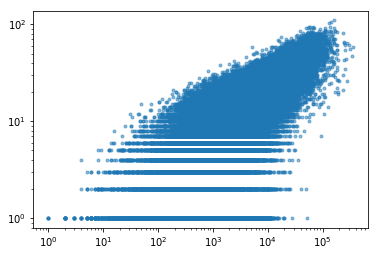

In [36]:
x=behavior['record']
y=behavior['A_N']
plt.plot(x, y,'.', alpha = .5)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [19]:
behavior['terminal_price']=behavior['terminal_price'].apply(lambda x:math.log(x))

In [38]:
behavior['record']=behavior['record'].apply(lambda x:math.log(x))

In [43]:
reg = smf.ols('record ~ A_N+A_AE+terminal_price+house_price+fees',
               data = behavior).fit()
 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 record   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     4536.
Date:                Wed, 01 Aug 2018   Prob (F-statistic):               0.00
Time:                        21:46:55   Log-Likelihood:                -31040.
No. Observations:               25988   AIC:                         6.209e+04
Df Residuals:                   25982   BIC:                         6.214e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.2206      0.056    129.305      0.000       7.111       7.330
A_N                0.1067      0.001    146.892      0.000       0.105       0.108
A_AE              -0.7910      0.015    -54.413      0.000      -0.819      -0.762
terminal_price     0.0830      0.007     11.164      0.000       0.068       0.098
house_price     -8.75e-07   3.34e-07     -2.622      0.009   -1.53e-06   -2.21e-07
fees               0.0009   6.87e-05     13.247      0.000       0.001       0.001
==============================================================================
Omnibus:                     5565.262   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20278.264
Skew:                          -1.047   Prob(JB):                         0.00
Kurtosis:                       6.787   Cond. No.                     4.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# complete information user

In [119]:
columns = 'user_id，sex，age，occupation_name，education_name，user_opentime，brand_name，call_duration_m，gprs_flow，\
call_fee，gprs_fee，databusiness_fee，brand_chn，model_chn，screensize，operation_sys，terminal_price，\
dept_county_name，dept_name，house_price'.split('，')

basename_except = pd.read_csv('./basename_except.csv', names=columns)

basename_except['fees']=basename_except['call_fee']+basename_except['gprs_fee']+basename_except['databusiness_fee']

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [120]:
basename_except = basename_except[['user_id','gprs_flow','terminal_price',
                                   'fees','call_duration_m','house_price']]
basename_except = basename_except.dropna(axis=0,how='any')

In [121]:
users=basename_except['user_id'].unique()

In [122]:
len(users)

9350

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


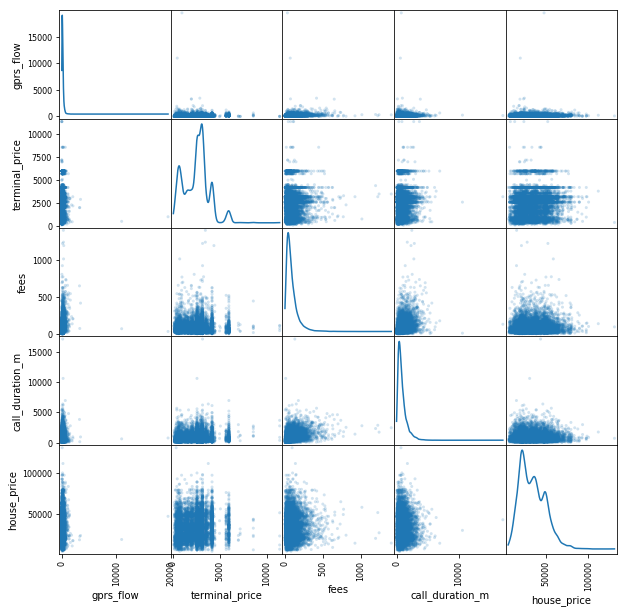

In [124]:
scatter_matrix(basename_except[['gprs_flow','terminal_price','fees','call_duration_m',
                                'house_price']],alpha=0.2,figsize=(10,10),diagonal='kde')
plt.show()